In [1]:
# Imports, settings and dataset view
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from collections import Counter
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pickle

# Set pandas to show all columns when you print a dataframe
pd.set_option('display.max_columns', None)

In [2]:
# Read all the datasets
df_list= [pd.read_csv('Class/binaryAllNaturalPlusNormalVsAttacks/data{}.csv'.format(i)) for i in range(1, 15)]
# Union all the datasets into one
df_bin = pd.concat(df_list)
df_bin

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0.0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0.0,0,0,0,0,0,0,0,0,0,0,0,0,Natural
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,12

In [3]:
# Information about the dataset
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73101 entries, 0 to 5114
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 72.5+ MB


In [4]:
# Read all the datasets
df_list= [pd.read_csv('Class/triple/data{}.csv'.format(i)) for i in range(1, 15)]
# Union all the datasets into one
df_trip = pd.concat(df_list)
df_trip

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,

In [5]:
# Information about the dataset
df_trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73101 entries, 0 to 5114
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 72.5+ MB


In [6]:
# Importing library
import os

# Getting all the arff files from the Class/multiclass/ directory
# files = [arff for arff in os.listdir('.') if arff.endswith(".arff")]
files = [arff for arff in os.listdir('Class/multiclass/') if arff.endswith(".arff")]
files = [os.path.join('Class/multiclass/', file) for file in files]

# Function for converting arff list to csv list
def toCsv(text):
    data = False
    header = ""
    new_content = []
    for line in text:
        if not data:
            if "@ATTRIBUTE" in line or "@attribute" in line:
                attributes = line.split()
                if("@attribute" in line):
                    attri_case = "@attribute"
                else:
                    attri_case = "@ATTRIBUTE"
                column_name = attributes[attributes.index(attri_case) + 1]
                header = header + column_name + ","
            elif "@DATA" in line or "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                new_content.append(header)
        else:
            new_content.append(line)
    return new_content


# Main loop for reading and writing files
for file in files:
    with open(file, "r") as inFile:
        content = inFile.readlines()
        name, ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        # Change the name so everything before the first space is the name
        name = name.split(" ")[0]
        with open(name + ".csv", "w") as outFile:
            outFile.writelines(new)

In [8]:
# Read .csv.arff (weka) and convert it to .csv
import pandas as pd
import numpy as np
import plotly.express as px

# Read all the files
df_list= [pd.read_csv('Class/multiclass/data{}.csv'.format(i)) for i in range(1, 15)]
df_mult = pd.concat(df_list)
df_mult

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532105,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0.0,0,0,0,0,0,0,0,0,0,0,0,0,41
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0.0,0,0,0,0,0,0,0,0,0,0,0,0,41
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,127798.4572,

In [9]:
# Information about the dataset
df_mult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73101 entries, 0 to 5114
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(16)
memory usage: 72.5 MB


In [10]:
markers = pd.concat([df_bin['marker'], df_trip['marker'], df_mult['marker']], axis=1)
markers.columns = ['binary', 'triple', 'multiclass']
markers

,binary,triple,multiclass
0,Natural,NoEvents,41
1,Natural,NoEvents,41
2,Natural,NoEvents,41
3,Natural,NoEvents,41
4,Natural,NoEvents,41
...,...,...,...
5110,Natural,Natural,1
5111,Natural,Natural,1
5112,Natural,Natural,1
5113,Natural,Natural,1


In [11]:
# Draw a graph (sunburst) to show the distribution of the data
px.sunburst(markers, path=['binary','triple','multiclass'])

#### Natural Events

| Scenario | Natural events (SLG faults) |
| ----- | ----- |
| 1 | Fault from 10-19% on L1 |
| 2 | Fault from 20-79% on L1 |
| 3 | Fault from 80-90% on L1 |
| 4 | Fault from 10-19% on L2 |
| 5 | Fault from 20-79% on L2 |
| 6 | Fault from 80-90% on L2 |
| | <br> |
| | **Natural events (Line maintenance)** |
| 13 | Line L1 maintenance |
| 14 | Line L2 maintenance |

#### Regular Operation
| Scenario | No Events (Normal operation) |
| ----- | ----- |
| 41 | Normal Operation load changes |

#### Attack Scenarios
| Scenario | Attack Type |
| ----- | ----- |
| | **Data Injection** |
| | ***Attack Sub-type (SLG fault replay)*** |
| 7 | Fault from 10-19% on L1 with tripping command |
| 8 | Fault from 20-79% on L1 with tripping command |
| 9 | Fault from 80-90% on L1 with tripping command |
| 10 | Fault from 10-19% on L2 with tripping command |
| 11 | Fault from 20-79% on L2 with tripping command |
| 12 | Fault from 80-90% on L2 with tripping command |
| | <br> |
| | **Remote Tripping Command Injection** |
| | ***Attack Sub-type (Command injection against single relay)*** |
| 15 | Command Injection to R1 |
| 16 | Command Injection to R2 |
| 17 | Command Injection to R3 |
| 18 | Command Injection to R4 |
| | <br> |
| | **Attack Sub-type (Command injection against single relay)** |
| 19 | Command Injection to R1 and R2 |
| 20 | Command Injection to R3 and R4 |
| | <br> |
| | **Relay Setting Change** |
| | ***Attack Sub-type (Disabling relay function - single relay disabled & fault)*** |
| 21 | Fault from 10-19% on L1 with R1 disabled & fault |
| 22 | Fault from 20-90% on L1 with R1 disabled & fault |
| 23 | Fault from 10-49% on L1 with R2 disabled & fault |
| 24 | Fault from 50-79% on L1 with R2 disabled & fault |
| 25 | Fault from 80-90% on L1 with R2 disabled & fault |
| 26 | Fault from 10-19% on L2 with R3 disabled & fault |
| 27 | Fault from 20-49% on L2 with R3 disabled & fault |
| 28 | Fault from 50-90% on L2 with R3 disabled & fault |
| 29 | Fault from 10-79% on L2 with R4 disabled & fault |
| 30 | Fault from 80-90% on L2 with R4 disabled & fault |
| | <br> |
| | **Attack Sub-type (Disabling relay function - two relays disabled & fault)** |
| 35 | Fault from 10-49% on L1 with R1 and R2 disabled & fault |
| 36 | Fault from 50-90% on L1 with R1 and R2 disabled & fault |
| 37 | Fault from 10-49% on L1 with R3 and R4 disabled & fault |
| 38 | Fault from 50-90% on L1 with R3 and R4 disabled & fault |
| | <br> |
| | **Attack Sub-type (Disabling relay function - two relay disabled & line maintenance)** |
| 39 | L1 maintenance with R1 and R2 disabled |
| 40 | L1 maintenance with R1 and R2 disabled |

In [12]:
scenarios = {1: "Natural events (SLG faults), Fault from 10-19% on L1",
             2: "Natural events (SLG faults), Fault from 20-79% on L1",
             3: "Natural events (SLG faults), Fault from 80-90% on L1",
             4: "Natural events (SLG faults), Fault from 10-19% on L2",
             5: "Natural events (SLG faults), Fault from 20-79% on L1",
             6: "Natural events (SLG faults), Fault from 80-90% on L1",
             7: "Data Injection, Attack Sub-type (SLG fault replay), Fault from 10-19% on L1 with tripping command",
             8: "Data Injection, Attack Sub-type (SLG fault replay), Fault from 20-79% on L1 with tripping command",
             9: "Data Injection, Attack Sub-type (SLG fault replay), Fault from 80-90% on L1 with tripping command",
             10: "Data Injection, Attack Sub-type (SLG fault replay), Fault from 10-19% on L2 with tripping command",
             11: "Data Injection, Attack Sub-type (SLG fault replay), Fault from 20-79% on L2 with tripping command",
             12: "Data Injection, Attack Sub-type (SLG fault replay), Fault from 80-90% on L2 with tripping command",
             13: "Natural events (Line maintenance), Line L1 maintenance",
             14: "Natural events (Line maintenance), Line L2 maintenance",
             15: "Remote Tripping Command Injection, Attack Sub-type (Command injection against single relay), Command Injection to R1",
             16: "Remote Tripping Command Injection, Attack Sub-type (Command injection against single relay), Command Injection to R2",
             17: "Remote Tripping Command Injection, Attack Sub-type (Command injection against single relay), Command Injection to R3",
             18: "Remote Tripping Command Injection, Attack Sub-type (Command injection against single relay), Command Injection to R4",
             19: "Remote Tripping Command Injection, Attack Sub-type (Command injection against single relay), Command Injection to R1 and R2",
             20: "Remote Tripping Command Injection, Attack Sub-type (Command injection against single relay), Command Injection to R3 and R4",
             21: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 10-19% on L1 with R1 disabled & fault",
             22: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 20-90% on L1 with R1 disabled & fault",
             23: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 10-49% on L1 with R2 disabled & fault",
             24: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 50-79% on L1 with R2 disabled & fault",
             25: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 80-90% on L1 with R2 disabled & fault",
             26: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 10-19% on L2 with R3 disabled & fault",
             27: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 20-49% on L2 with R3 disabled & fault",
             28: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 50-90% on L2 with R3 disabled & fault",
             29: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 10-79% on L2 with R4 disabled & fault",
             30: "Relay Setting Change, Attack Sub-type (Disabling relay function - single relay disabled & fault), Fault from 80-90% on L2 with R4 disabled & fault",
             35: "Relay Setting Change, Attack Sub-type (Disabling relay function - two relays disabled & fault), Fault from 10-49% on L1 with R1 and R2 disabled & fault",
             36: "Relay Setting Change, Attack Sub-type (Disabling relay function - two relays disabled & fault), Fault from 50-90% on L1 with R1 and R2 disabled & fault",
             37: "Relay Setting Change, Attack Sub-type (Disabling relay function - two relays disabled & fault), Fault from 10-49% on L1 with R3 and R4 disabled & fault",
             38: "Relay Setting Change, Attack Sub-type (Disabling relay function - two relays disabled & fault), Fault from 50-90% on L1 with R3 and R4 disabled & fault",
             39: "Relay Setting Change, Attack Sub-type (Disabling relay function - two relay disabled & line maintenance), L1 maintenance with R1 and R2 disabled",
             40: "Relay Setting Change, Attack Sub-type (Disabling relay function - two relay disabled & line maintenance), L1 maintenance with R1 and R2 disabled",
             41: "No Events (Normal operation), Normal Operation load changes"}

In [13]:
# Features engineering
apparent_impedance_measurements_headers_names = ['R1-PA:Z', 'R2-PA:Z', 'R3-PA:Z', 'R4-PA:Z']

voltage_phase_angles_headers_names = ['R1-PA1:VH', 'R1-PA2:VH', 'R1-PA3:VH',
                                      'R2-PA1:VH', 'R2-PA2:VH', 'R2-PA3:VH',
                                      'R3-PA1:VH', 'R3-PA2:VH', 'R3-PA3:VH',
                                      'R4-PA1:VH', 'R4-PA2:VH', 'R4-PA3:VH']

current_phase_angles_headers_names = ['R1-PA4:IH', 'R1-PA5:IH', 'R1-PA6:IH',
                                      'R2-PA4:IH', 'R2-PA5:IH', 'R2-PA6:IH',
                                      'R3-PA4:IH', 'R3-PA5:IH', 'R3-PA6:IH',
                                      'R4-PA4:IH', 'R4-PA5:IH', 'R4-PA6:IH']

voltage_phase_magnitudes_headers_names = ['R1-PM1:V', 'R1-PM2:V', 'R1-PM3:V',
                                          'R2-PM1:V', 'R2-PM2:V', 'R2-PM3:V',
                                          'R3-PM1:V', 'R3-PM2:V', 'R3-PM3:V',
                                          'R4-PM1:V', 'R4-PM2:V', 'R4-PM3:V']

current_phase_magnitudes_header_names = ['R1-PM4:I', 'R1-PM5:I', 'R1-PM6:I',
                                         'R2-PM4:I', 'R2-PM5:I', 'R2-PM6:I',
                                         'R3-PM4:I', 'R3-PM5:I', 'R3-PM6:I',
                                         'R4-PM4:I', 'R4-PM5:I', 'R4-PM6:I']

# Apparent Impedance measurements for each relay (R1-PA:Z, R2-PA:Z, R3-PA:Z, R4-PA:Z), having values in the 4.8 to 4.9 range
for header in apparent_impedance_measurements_headers_names:
    df_mult[header+'_in_range(4.8-4.9)'] = np.where((df_mult[header] >= 4.8) & (df_mult[header] <= 4.9), 1, 0)

# Voltage Phase Angles (PA1:VH – PA3:VH) in the 3.0 range
for header in voltage_phase_angles_headers_names:
    df_mult[header + '_in_range(3.0)'] = np.where(abs(df_mult[header]-3.0) <= 0.5, 1, 0)

# Current Phase Angles (PA4:IH – PA6:IH) in the 3.0 range
for header in current_phase_angles_headers_names:
    df_mult[header + '_in_range(3.0)'] = np.where(abs(df_mult[header]-3.0) <= 0.5, 1, 0)

# Voltage Phase Magnitudes (PM1:V – PM3:V) in the 3.0 range
for header in voltage_phase_magnitudes_headers_names:
    df_mult[header + '_in_range(3.0)'] = np.where(abs(df_mult[header]-3.0) <= 0.5, 1, 0)

# Current Phase Magnitudes (PM4:I – PM6:I) in the 3.0 range
for header in current_phase_magnitudes_header_names:
    df_mult[header + '_in_range(3.0)'] = np.where(abs(df_mult[header]-3.0) <= 0.5, 1, 0)

In [14]:
# Remove all NAN columns or replace with desired string
# This loop iterates over all of the column names which are all NaN
for column in df_mult.columns[df_mult.isna().any()].tolist():
    # df.drop(column, axis=1, inplace=True)
    df_mult[column] = df_mult[column].fillna(0.0)

# If you want to detect columns that may have only some NaN values use this:
# df.loc[:, df.isna().any()].tolist()

df_mult.head()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker,R1-PA:Z_in_range(4.8-4.9),R2-PA:Z_in_range(4.8-4.9),R3-PA:Z_in_range(4.8-4.9),R4-PA:Z_in_range(4.8-4.9),R1-PA1:VH_in_range(3.0),R1-PA2:VH_in_range(3.0),R1-PA3:VH_in_range(3.0),R2-PA1:VH_in_range(3.0),R2-PA2:VH_in_range(3.0),R2-PA3:VH_in_range(3.0),R3-PA1:VH_in_range(3.0),R3-PA2:VH_in_range(3.0),R3-PA3:VH_in_range(3.0),R4-PA1:VH_in_range(3.0),R4-PA2:VH_in_range(3.0),R4-PA3:VH_in_range(3.0),R1-PA4:IH_in_range(3.0),R1-PA5:IH_in_range(3.0),R1-PA6:IH_in_range(3.0),R2-PA4:IH_in_range(3.0),R2-PA5:IH_in_range(3.0),R2-PA6:IH_in_range(3.0),R3-PA4:IH_in_range(3.0),R3-PA5:IH_in_range(3.0),R3-PA6:IH_in_range(3.0),R4-PA4:IH_in_range(3.0),R4-PA5:IH_in_range(3.0),R4-PA6:IH_in_range(3.0),R1-PM1:V_in_range(3.0),R1-PM2:V_in_range(3.0),R1-PM3:V_in_range(3.0),R2-PM1:V_in_range(3.0),R2-PM2:V_in_range(3.0),R2-PM3:V_in_range(3.0),R3-PM1:V_in_range(3.0),R3-PM2:V_in_range(3.0),R3-PM3:V_in_range(3.0),R4-PM1:V_in_range(3.0),R4-PM2:V_in_range(3.0),R4-PM3:V_in_range(3.0),R1-PM4:I_in_range(3.0),R1-PM5:I_in_range(3.0),R1-PM6:I_in_range(3.0),R2-PM4:I_in_range(3.0),R2-PM5:I_in_range(3.0),R2-PM6:I_in_range(3.0),R3-PM4:I_in_range(3.0),R3-PM5:I_in_range(3.0),R3-PM6:I_in_range(3.0),R4-PM4:I_in_range(3.0),R4-PM5:I_in_range(3.0),R4-PM6:I_in_range(3.0)
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532105,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0.0,0,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-

In [15]:
df_mult.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [16]:
df_mult = df_mult.replace([np.inf, -np.inf], np.nan)
df_mult = df_mult.dropna()
df_mult = df_mult.reset_index()

In [17]:
# LabelEncoder encodes labels with a value between 0 and n_classes-1
le = LabelEncoder()
# StandardScaler scales values by subtracting the mean and dividing by the standard deviation
ss = StandardScaler()
# QuantileTransformer transforms features using quantiles information
qt = QuantileTransformer()
# RobustScaler scales values by subtracting the median and dividing by the interquartile range
rs = RobustScaler()
# MinMaxScaler scales values between 0 and 1
mms = MinMaxScaler()
# LogTransformer transforms features by taking the natural logarithm
lt = FunctionTransformer(np.log1p)
# Preprocessing
def vectorize_df(df):
    df_numeric = df.select_dtypes(include=[np.number])
    # Perform label encoder on marked column
    df['marker'] = le.fit_transform(df['marker'])
    for column in df_numeric.columns:
        if column == 'marker':
            continue
        column_data = df_numeric[column]
        # To avoid Input X contains infinity or a value too large for dtype('float64') error we replace them with float.max
        column_data = column_data.replace([np.inf, -np.inf], np.finfo(np.float64).max)
        # Check if the data is normally distributed
        if column_data.skew() < 0.5:
            df_numeric[column] = ss.fit_transform(column_data.values.reshape(-1,1))
        # Check if the data has extreme outliers
        elif column_data.quantile(0.25) < -3 or column_data.quantile(0.75) > 3:
            df_numeric[column] = rs.fit_transform(column_data.values.reshape(-1,1))
        # Check if the data has a Gaussian-like distribution
        elif 0.5 < column_data.skew() < 1:
            df_numeric[column] = lt.fit_transform(column_data.values.reshape(-1,1))
        # Check if the data can be transformed into a Gaussian-like distribution
        elif column_data.skew() > 1:
            df_numeric[column] = qt.fit_transform(column_data.values.reshape(-1,1))
        else:
            df_numeric[column] = mms.fit_transform(column_data.values.reshape(-1,1))
            df[df_numeric.columns] = df_numeric
    return df

df_mult = vectorize_df(df_mult)
df_mult.head()

,index,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker,R1-PA:Z_in_range(4.8-4.9),R2-PA:Z_in_range(4.8-4.9),R3-PA:Z_in_range(4.8-4.9),R4-PA:Z_in_range(4.8-4.9),R1-PA1:VH_in_range(3.0),R1-PA2:VH_in_range(3.0),R1-PA3:VH_in_range(3.0),R2-PA1:VH_in_range(3.0),R2-PA2:VH_in_range(3.0),R2-PA3:VH_in_range(3.0),R3-PA1:VH_in_range(3.0),R3-PA2:VH_in_range(3.0),R3-PA3:VH_in_range(3.0),R4-PA1:VH_in_range(3.0),R4-PA2:VH_in_range(3.0),R4-PA3:VH_in_range(3.0),R1-PA4:IH_in_range(3.0),R1-PA5:IH_in_range(3.0),R1-PA6:IH_in_range(3.0),R2-PA4:IH_in_range(3.0),R2-PA5:IH_in_range(3.0),R2-PA6:IH_in_range(3.0),R3-PA4:IH_in_range(3.0),R3-PA5:IH_in_range(3.0),R3-PA6:IH_in_range(3.0),R4-PA4:IH_in_range(3.0),R4-PA5:IH_in_range(3.0),R4-PA6:IH_in_range(3.0),R1-PM1:V_in_range(3.0),R1-PM2:V_in_range(3.0),R1-PM3:V_in_range(3.0),R2-PM1:V_in_range(3.0),R2-PM2:V_in_range(3.0),R2-PM3:V_in_range(3.0),R3-PM1:V_in_range(3.0),R3-PM2:V_in_range(3.0),R3-PM3:V_in_range(3.0),R4-PM1:V_in_range(3.0),R4-PM2:V_in_range(3.0),R4-PM3:V_in_range(3.0),R1-PM4:I_in_range(3.0),R1-PM5:I_in_range(3.0),R1-PM6:I_in_range(3.0),R2-PM4:I_in_range(3.0),R2-PM5:I_in_range(3.0),R2-PM6:I_in_range(3.0),R3-PM4:I_in_range(3.0),R3-PM5:I_in_range(3.0),R3-PM6:I_in_range(3.0),R4-PM4:I_in_range(3.0),R4-PM5:I_in_range(3.0),R4-PM6:I_in_range(3.0)
0,0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532105,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0.0,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128

In [18]:
# Choose features for the model
features_list = df_mult.columns.to_list()
features_list.remove('marker')
features_list.remove('index')
features_list

['R1-PA1:VH',
 'R1-PM1:V',
 'R1-PA2:VH',
 'R1-PM2:V',
 'R1-PA3:VH',
 'R1-PM3:V',
 'R1-PA4:IH',
 'R1-PM4:I',
 'R1-PA5:IH',
 'R1-PM5:I',
 'R1-PA6:IH',
 'R1-PM6:I',
 'R1-PA7:VH',
 'R1-PM7:V',
 'R1-PA8:VH',
 'R1-PM8:V',
 'R1-PA9:VH',
 'R1-PM9:V',
 'R1-PA10:IH',
 'R1-PM10:I',
 'R1-PA11:IH',
 'R1-PM11:I',
 'R1-PA12:IH',
 'R1-PM12:I',
 'R1:F',
 'R1:DF',
 'R1-PA:Z',
 'R1-PA:ZH',
 'R1:S',
 'R2-PA1:VH',
 'R2-PM1:V',
 'R2-PA2:VH',
 'R2-PM2:V',
 'R2-PA3:VH',
 'R2-PM3:V',
 'R2-PA4:IH',
 'R2-PM4:I',
 'R2-PA5:IH',
 'R2-PM5:I',
 'R2-PA6:IH',
 'R2-PM6:I',
 'R2-PA7:VH',
 'R2-PM7:V',
 'R2-PA8:VH',
 'R2-PM8:V',
 'R2-PA9:VH',
 'R2-PM9:V',
 'R2-PA10:IH',
 'R2-PM10:I',
 'R2-PA11:IH',
 'R2-PM11:I',
 'R2-PA12:IH',
 'R2-PM12:I',
 'R2:F',
 'R2:DF',
 'R2-PA:Z',
 'R2-PA:ZH',
 'R2:S',
 'R3-PA1:VH',
 'R3-PM1:V',
 'R3-PA2:VH',
 'R3-PM2:V',
 'R3-PA3:VH',
 'R3-PM3:V',
 'R3-PA4:IH',
 'R3-PM4:I',
 'R3-PA5:IH',
 'R3-PM5:I',
 'R3-PA6:IH',
 'R3-PM6:I',
 'R3-PA7:VH',
 'R3-PM7:V',
 'R3-PA8:VH',
 'R3-PM8:V',
 'R3-PA9:VH',
 'R3

In [19]:
# Draw a scatter plot of the data
def draw_scatter_plot(df, features_list, title):
    fig = px.scatter(df, x=features_list[0], y=features_list[1], color='marker', title=title)
    fig.show()

draw_scatter_plot(df_mult, features_list, "Scatter plot of the data")

In [20]:
# Draw a heatmap of the data
def draw_heatmap(df, title):
    fig = px.imshow(df.corr(), title=title)
    fig.show()

draw_heatmap(df_mult, "Heatmap of the data")

In [21]:
# Train test split
X = df_mult[features_list]
y = np.stack(df_mult['marker'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
counter = Counter(y)
counter

(50415, 180) (50415,)
(16806, 180) (16806,)


Counter({36: 3891,
         35: 1576,
         34: 1424,
         33: 2193,
         32: 2251,
         31: 4021,
         30: 4229,
         29: 2176,
         28: 1858,
         27: 1771,
         26: 1348,
         25: 1858,
         24: 2220,
         23: 1683,
         22: 2217,
         21: 1081,
         20: 1040,
         19: 1238,
         18: 1541,
         17: 1043,
         16: 1069,
         15: 1110,
         14: 1095,
         13: 1487,
         12: 1348,
         11: 1752,
         10: 1701,
         9: 1566,
         8: 982,
         7: 1056,
         6: 1196,
         5: 2945,
         4: 2593,
         3: 2407,
         2: 1549,
         1: 1428,
         0: 1278})

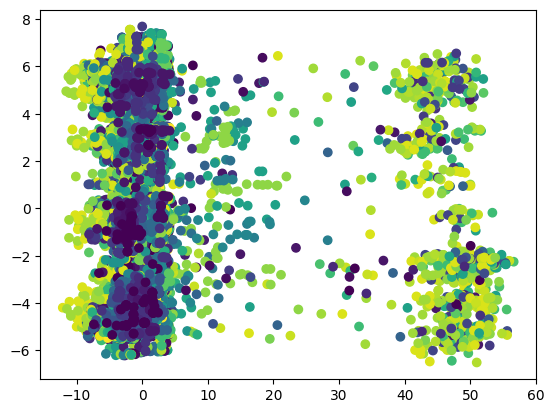

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_after_pca_in_2D = pca.fit_transform(ss.fit_transform(df_mult[features_list].to_numpy()))
plt.scatter(x_after_pca_in_2D[:, 0], x_after_pca_in_2D[:, 1], c=df_mult['marker'].map({p:p for p in range(0,36)}))

In [23]:
pca = PCA()
pca.fit(ss.fit_transform(df_mult[features_list].to_numpy()))

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"},
    range_y=(0.98, 1.02),
    title="SVD Explained Variance Ratio"
)

Fitting estimator with 180 features.
Fitting estimator with 180 features.
Fitting estimator with 179 features.
Fitting estimator with 179 features.
Fitting estimator with 178 features.
Fitting estimator with 178 features.
Fitting estimator with 177 features.
Fitting estimator with 177 features.
Fitting estimator with 176 features.
Fitting estimator with 176 features.
Fitting estimator with 175 features.
Fitting estimator with 175 features.
Fitting estimator with 174 features.
Fitting estimator with 174 features.
Fitting estimator with 173 features.
Fitting estimator with 173 features.
Fitting estimator with 172 features.
Fitting estimator with 172 features.
Fitting estimator with 171 features.
Fitting estimator with 171 features.
Fitting estimator with 170 features.
Fitting estimator with 170 features.
Fitting estimator with 169 features.
Fitting estimator with 169 features.
Fitting estimator with 168 features.
Fitting estimator with 168 features.
Fitting estimator with 167 features.
F

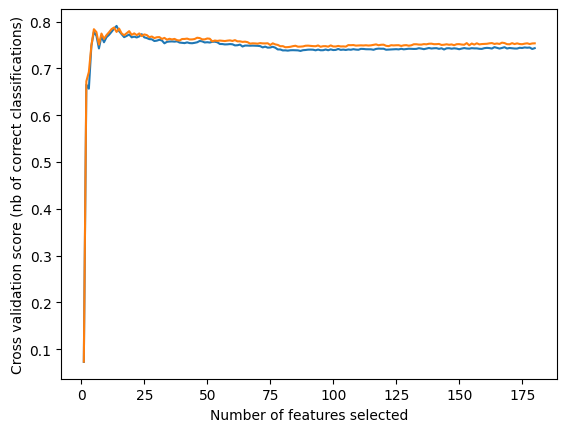

In [ ]:
# Feature selection

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
recall_scorer = make_scorer(recall_score, pos_label=1, average='macro')
rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=750,criterion= "entropy",max_depth= 20, min_samples_split= 2, random_state=43, n_jobs=-1), step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=1, n_jobs=-1)
#rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=1, n_jobs=-1)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

X_train = rfecv.transform(X_train)
X_test = rfecv.transform(X_test)

# Save the model
pickle.dump(rfecv, open('Unification/multiclass_rfecv.pkl', 'wb'))

In [24]:
# Load the rfecv model
from sklearn.feature_selection import RFECV
rfecv = pickle.load(open('Unification/multiclass_rfecv.pkl', 'rb'))

In [25]:
# Print the optimal features
optimal_features = []
for i in range(len(rfecv.support_)):
    if rfecv.support_[i]:
        optimal_features.append(features_list[i])
print("Optimal features: "+ str(optimal_features))

Optimal features: ['R1-PA1:VH', 'R1-PM2:V', 'R1-PM5:I', 'R2-PA2:VH', 'R2-PM3:V', 'R2-PM5:I', 'R3-PA1:VH', 'R3-PM2:V', 'R3-PM5:I', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM5:I']


In [26]:
def create_grid_search(model, params):
    # Create a grid search object which is used to find the best hyperparameters for the model
    from sklearn.model_selection import GridSearchCV
    return GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, verbose=3, cv=5, scoring='accuracy', return_train_score=True)

In [27]:
def show(model):
    # We print our results
    sns.set(rc={'figure.figsize': (15, 8)})
    predictions = model.predict(X_test)
    true_labels = y_test
    cf_matrix = confusion_matrix(true_labels, predictions)
    model_report = classification_report(true_labels, predictions, digits=5)
    heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))

    # The heatmap is cool but this is the most important result
    print(model_report)

In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf_params = {
    "n_estimators": [750],
    "criterion": ["entropy"],
    "max_depth": [20],
    "min_samples_split": [5],
    "random_state": [43],
    "n_jobs": [-1],
}
rf_grid = create_grid_search(rf, rf_params)
rf_grid.fit(X_train, y_train)
rf = rf_grid.best_estimator_
pickle.dump(rf, open('Unification/multiclass_rfc.pkl', 'wb'))
show(rf)

Fitting 45 folds for each of 1 candidates, totalling 45 fits


KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [28]:
rf = pickle.load(open('Unification/multiclass_rfc.pkl', 'rb'))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 3/5] END learning_rate=0.01, n_estimators=650;, score=(train=1.000, test=0.818) total time=30.2min
[CV 1/5] END learning_rate=0.01, n_estimators=450;, score=(train=1.000, test=0.813) total time=30.4min
[CV 2/5] END learning_rate=0.01, n_estimators=950;, score=(train=1.000, test=0.807) total time=30.5min
[CV 3/5] END learning_rate=0.01, n_estimators=950;, score=(train=1.000, test=0.817) total time=30.5min
[CV 3/5] END learning_rate=0.01, n_estimators=450;, score=(train=1.000, test=0.816) total time=30.6min
[CV 5/5] END learning_rate=0.01, n_estimators=650;, score=(train=1.000, test=0.817) total time=30.6min
[CV 2/5] END learning_rate=0.01, n_estimators=650;, score=(train=1.000, test=0.808) total time=30.7min
[CV 1/5] END learning_rate=0.01, n_estimators=950;, score=(train=1.000, test=0.814) total time=30.7min
[CV 1/5] END learning_rate=0.01, n_estimators=650;, score=(train=1.000, test=0.814) total time=30.7min
[CV 5/5] END

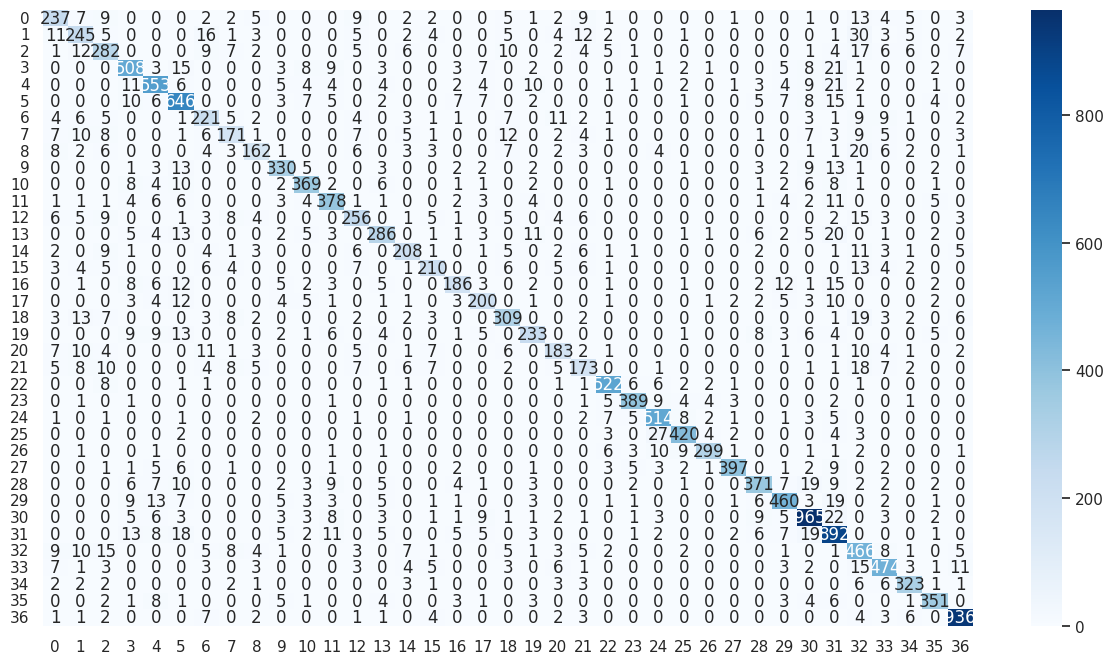

In [31]:
# Random Forest Classifier + AdaBoost
rf_ada = AdaBoostClassifier(base_estimator=rf)
rf_ada_params = {
    'n_estimators': [450, 650, 950],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}
rf_ada_gcv = create_grid_search(rf_ada, rf_ada_params)
rf_ada_gcv.fit(X_train, y_train)

rf_ada = rf_ada_gcv.best_estimator_

# Save the model
pickle.dump(rf_ada, open('Unification/multiclass_rf_ada.pkl', 'wb'))

show(rf_ada)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 2/5] END algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=3, p=1, weights=distance;, score=(train=1.000, test=0.684) total time= 1.1min
[CV 5/5] END algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=3, p=1, weights=distance;, score=(train=1.000, test=0.695) total time= 1.1min
[CV 4/5] END algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=3, p=1, weights=distance;, score=(train=1.000, test=0.693) total time= 1.1min
[CV 1/5] END algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=3, p=1, weights=distance;, score=(train=1.000, test=0.688) total time= 1.1min
[CV 3/5] END algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=3, p=1, weights=distance;, score=(train=1.000, test=0.691) total time= 1.1min
              precision    recall  f1-score   support

           0    0.55172   0.55000   0.55086       320
           1    0.49737   0.52941   0.51289       357
           2    0.51587   0.50388   0.50980       387
    

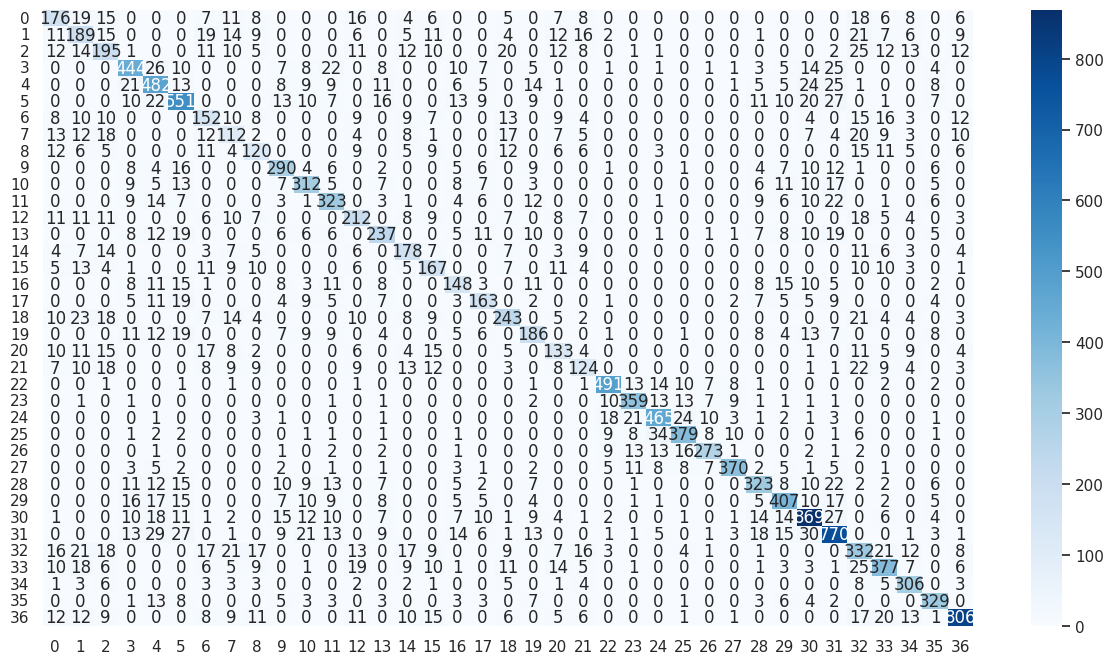

In [32]:
# K Nearest Neighbors
knn = KNeighborsClassifier()
knn_params = {
    "n_neighbors": [3],
    "weights": ["distance"],
    "algorithm": ["auto"],
    "leaf_size": [10],
    "p": [1],
    "n_jobs": [-1]
}
knn_grid = create_grid_search(knn, knn_params)
knn_grid.fit(X_train, y_train)
knn = knn_grid.best_estimator_
pickle.dump(knn, open('Unification/multiclass_knn.pkl', 'wb'))
show(knn)

In [ ]:
# Stacking Classifier ( Combining all the models )
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators=[('rf', rf), ('rf_ada', rf_ada), ('knn', knn)], final_estimator=LogisticRegression())
sc.fit(X_train, y_train)
pickle.dump(sc, open('Unification/multiclass_sc.pkl', 'wb'))
show(sc)

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:


df_1 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data12.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

In [ ]:


df_2 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data2.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_2

In [ ]:


df_3 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data1.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_3

In [ ]:


df_4 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data4.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_4

In [ ]:


df_5 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data15.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_5

In [ ]:


df_6 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data10.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_6

In [ ]:


df_7 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data14.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_7

In [ ]:


df_8 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data7.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_8

In [ ]:


df_9 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data11.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_9

In [ ]:


df_10 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data5.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_10

In [ ]:


df_11 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data6.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_11

In [ ]:


df_12 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data9.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_12

In [ ]:


df_13 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data13.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_13

In [ ]:


df_14 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data8.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_14

In [ ]:


df_15 = _deepnote_execute_sql("""SELECT *
FROM 'Class/binaryAllNaturalPlusNormalVsAttacks/data3.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_15

In [ ]:


df_16 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data12.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_16

In [ ]:


df_17 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data2.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_17

In [ ]:


df_18 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data1.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_18

In [ ]:


df_19 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data4.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_19

In [ ]:


df_20 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data15.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_20

In [ ]:


df_21 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data10.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_21

In [ ]:


df_22 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data14.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_22

In [ ]:


df_23 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data7.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_23

In [ ]:


df_24 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data11.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_24

In [ ]:


df_25 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data5.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_25

In [ ]:


df_26 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data6.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_26

In [ ]:


df_27 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data9.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_27

In [ ]:


df_28 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data13.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_28

In [ ]:


df_29 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data8.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_29

In [ ]:


df_30 = _deepnote_execute_sql("""SELECT *
FROM 'Class/multiclass/data3.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_30

In [ ]:


df_31 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data12.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_31

In [ ]:


df_32 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data2.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_32

In [ ]:


df_33 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data1.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_33

In [ ]:


df_34 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data4.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_34

In [ ]:


df_35 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data15.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_35

In [ ]:


df_36 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data10.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_36

In [ ]:


df_37 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data14.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_37

In [ ]:


df_38 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data7.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_38

In [ ]:


df_39 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data11.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_39

In [ ]:


df_40 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data5.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_40

In [ ]:


df_41 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data6.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_41

In [ ]:


df_42 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data9.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_42

In [ ]:


df_43 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data13.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_43

In [ ]:


df_44 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data8.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_44

In [ ]:


df_45 = _deepnote_execute_sql("""SELECT *
FROM 'Class/triple/data3.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_45

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6944f5ba-df3e-4aff-939e-fc7f0cc1e0df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>